# Steps to explain ML models with SHAP

## Load data

In [1]:
import pandas as pd

path = '../../../data/house_perth/output/ml_simple.csv'
df = pd.read_csv(path, index_col=0)
df

,Price,Bedrooms,Bathrooms,Garage,Build Year,Floor Area
ADDRESS,,,,,,
1 Datchet Turn,270000,3,2,2.0,2011.0,109
1 McKenzie Corner,470000,4,2,2.0,2005.0,279
...,...,...,...,...,...,...
93 Centennial Avenue,350000,4,2,2.0,2005.0,177
98 Centennial Avenue,441000,4,2,2.0,2004.0,195


## Feature selection

In [2]:
target = 'Price'

y = df[target]
X = df.drop(columns=target)

## Modelling

In [3]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X,y)

DecisionTreeRegressor()

In [4]:
model.score(X,y)

0.9746449876358452

## SHAP

### Explainer

In [5]:
import shap
explainer = shap.TreeExplainer(model)

### SHAP values

In [6]:
shap_values = explainer.shap_values(X)
shap_values

array([[-2.13846087e+04,  3.13861656e+00, -2.08095993e+03,
        -1.52517212e+04, -7.79583978e+04],
       [ 3.66276314e+03,  1.71568627e+00,  1.38493586e+02,
        -3.83486018e+03,  8.33593387e+04],
       [ 4.24511164e+03,  1.71568627e+00,  9.80745082e+02,
         3.10254771e+04,  2.20744015e+04],
       ...,
       [ 4.60089097e+03,  3.13861656e+00, -7.93429316e+02,
         1.60973882e+04, -5.80537476e+02],
       [ 5.13878828e+03,  1.71568627e+00, -1.46736980e+03,
        -5.41632786e+03, -3.49293553e+04],
       [ 4.24511164e+03,  1.71568627e+00,  1.45620804e+03,
         2.07227654e+04,  2.79016502e+04]])

### Plots

#### Summary: Bar

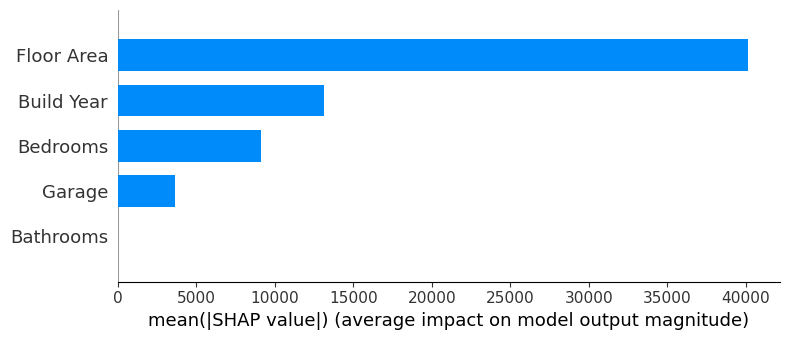

In [7]:
shap.summary_plot(shap_values, X, plot_type='bar')

#### Summary: Dot

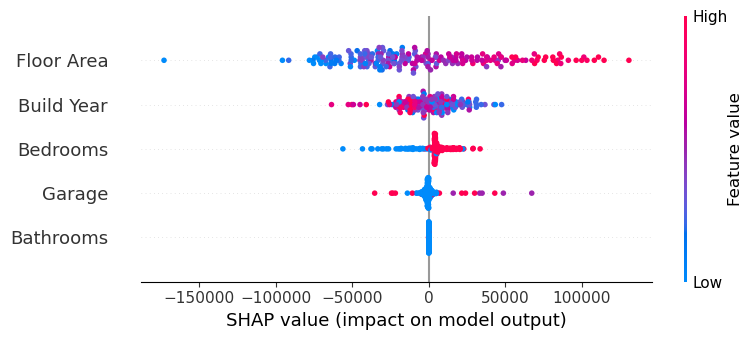

In [8]:
shap.summary_plot(shap_values, X, plot_type='dot')

#### Force

In [9]:
expected_value = explainer.expected_value
expected_value

array([386672.54901961])

In [10]:
shap.initjs() # Required for Jupyter Notebook; only once
shap.plots.force(expected_value, shap_values, X)

#### Decision

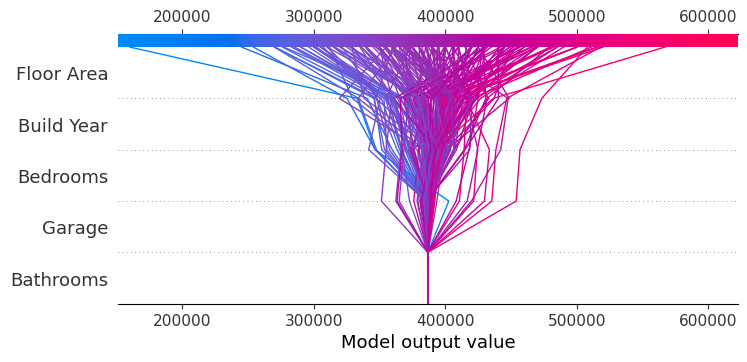

In [11]:
shap.decision_plot(expected_value, shap_values, X)

#### Force Individual

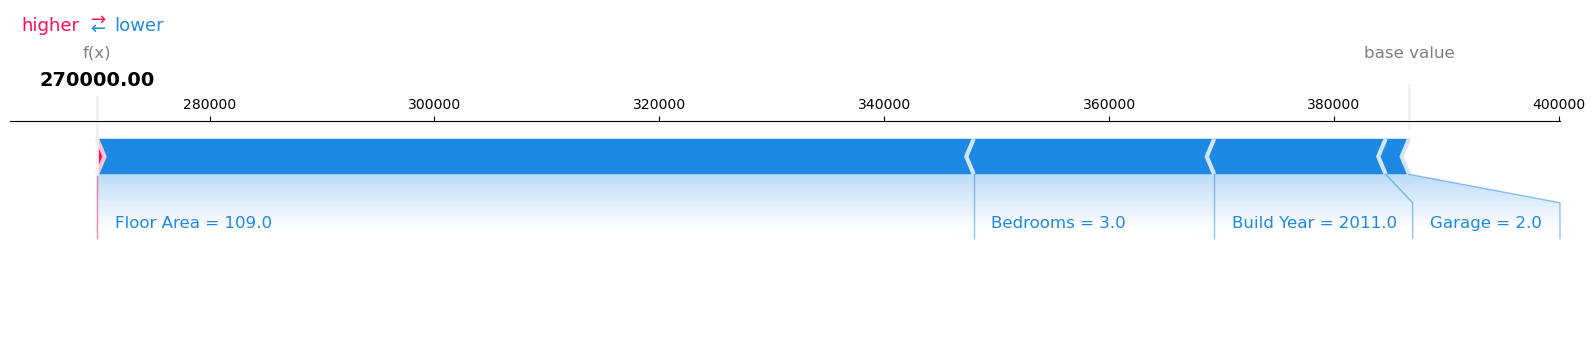

In [12]:
row = 0
shap.force_plot(expected_value, shap_values[row], X.iloc[row], matplotlib=True)

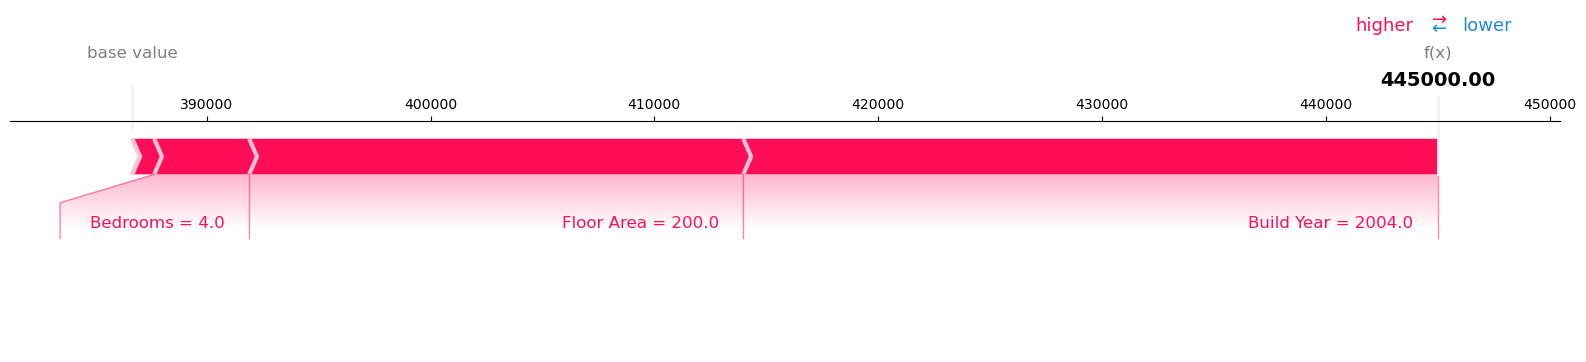

In [13]:
row = 2
shap.force_plot(expected_value, shap_values[row], X.iloc[row], matplotlib=True)

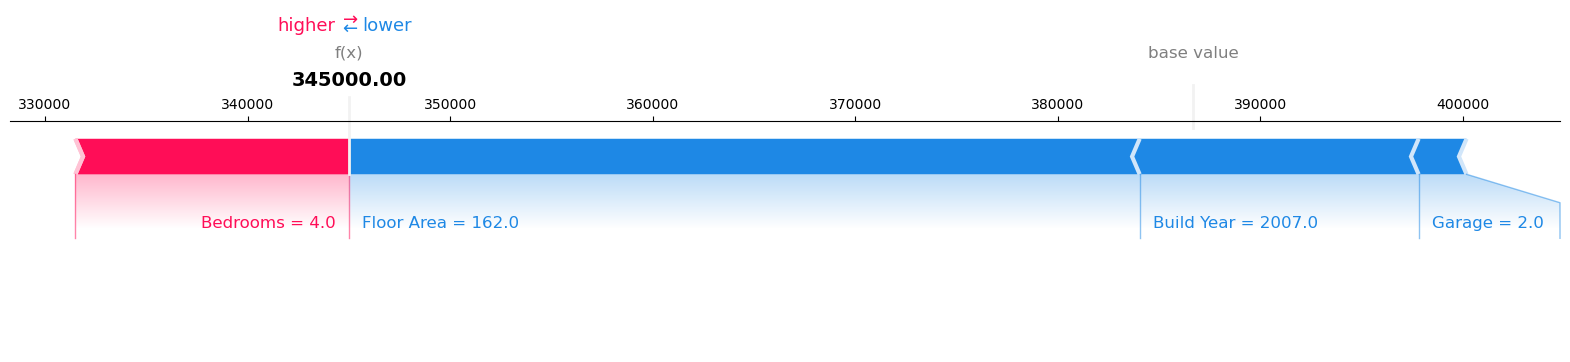

In [14]:
row = 14
shap.force_plot(expected_value, shap_values[row], X.iloc[row], matplotlib=True)